In [2]:
import bs4 as bs
import pandas as pd
# read the file
with open("coffee_review.txt", "r") as f:
    texts = f.read()

# parse the texts
soup = bs.BeautifulSoup(texts)

In [3]:
# filter everything that is class="review-template "
reviews = soup.find_all("div", class_="review-template")

In [4]:
import numpy as np

In [5]:
# iterate over the reviews
ratings = []
texts = []
titles = []
prices = []
review_dates = []
for review in reviews:
    # get the value for class=review-template-rating
    rating = review.find(class_="column col-1").text.strip().replace("\n", "")
    try:
        rating = int(rating)
    except:
        rating = np.nan
    ratings.append(rating)
    title = review.find(class_="review-title").text.strip().replace("\n", "")
    titles.append(title)
    text = review.find(class_="row row-2").text.strip().replace("\n", "")
    texts.append(text)
    price_review = review.find(class_="column col-3").text
    # split on /n and take the second element
    price = price_review.split("\n")[2].strip().replace(
        "\n", "").replace("Price: NT ", "")
    prices.append(price)
    review_date = price_review.split("\n")[1].strip().replace("\n", "").replace("Review Date:" , "")
    review_dates.append(review_date)

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({"rating": ratings, "title": titles, "text": texts, "price": prices, "review_date": review_dates})

In [8]:
df.head()

,rating,title,text,price,review_date
0,96.0,Ethiopia Washed Guji Uraga Welichu,"Remarkably sweet, rich-toned, deeply floral. S...",$375/8 ounces,Nov 2022
1,94.0,Don Roger & Isabel’s Natural Fruit Symphony,"Cocoa-toned, bright and vibrant. Cocoa nib, pi...",Price: $19.00/175 grams,Nov 2022
2,95.0,Kenya Gitare AA TOP,"Sweetly bright, richly savory. Narcissus, pink...",$340/8 ounces,Nov 2022
3,93.0,Costa Rica Naranjo Danilo Salazar Arias,"Crisply sweet, brightly tart. Tamarind, pineap...",Price: $24.00/12 ounces,Nov 2022
4,95.0,Yemen Natural Sana’a Manakhah Ja’adi,"Deeply spice-toned, richly layered. Black curr...",$900/4 ounces,Nov 2022


In [9]:
# count nan values
df.isna().sum()

rating         4
title          0
text           0
price          0
review_date    0
dtype: int64

In [10]:
# get the range for the rating
df["rating"].min(), df["rating"].max()

(52.0, 98.0)

(-0.5, 399.5, 199.5, -0.5)

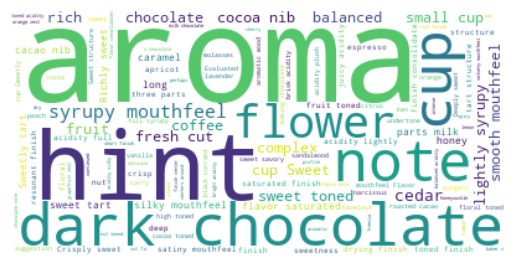

In [11]:
# make a wordcloud with the text
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# make a wordcloud in white with bigrams
wordcloud = WordCloud(background_color="white", collocations=True).generate(" ".join(df["text"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [12]:
# save the dataframe
df.to_csv("coffee_review.csv", index=False)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
# imort linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [14]:
# rename the nan values
df.dropna(inplace=True)

# remove duplicates
df.drop_duplicates(inplace=True)

In [15]:
df

,rating,title,text,price,review_date
0,96.0,Ethiopia Washed Guji Uraga Welichu,"Remarkably sweet, rich-toned, deeply floral. S...",$375/8 ounces,Nov 2022
1,94.0,Don Roger & Isabel’s Natural Fruit Symphony,"Cocoa-toned, bright and vibrant. Cocoa nib, pi...",Price: $19.00/175 grams,Nov 2022
2,95.0,Kenya Gitare AA TOP,"Sweetly bright, richly savory. Narcissus, pink...",$340/8 ounces,Nov 2022
3,93.0,Costa Rica Naranjo Danilo Salazar Arias,"Crisply sweet, brightly tart. Tamarind, pineap...",Price: $24.00/12 ounces,Nov 2022
4,95.0,Yemen Natural Sana’a Manakhah Ja’adi,"Deeply spice-toned, richly layered. Black curr...",$900/4 ounces,Nov 2022
...,...,...,...,...,...
6895,89.0,Smaldeel Estate,The only Zimbabwe in the cupping. Lighter and ...,,Mar 1997
6896,89.0,Ethiopia Yirgacheffe,"Another flower-laced Yirgacheffe, shimmering w...",,Mar 1997
6897,87.0,Kenya AA,"The Kenya wine tones are lighter here, more Bo...",,Mar 1997
6898,84.0,Kenya AA,Carbon tones overlay the sweet fruit fragrance...,,Mar 1997


In [16]:
# count number of distinct values in price
print(df["price"].value_counts())

                               1910
Price: $18.00/12 ounces         156
Price: NA                       109
Price: $16.00/12 ounces          98
Price: $20.00/12 ounces          96
                               ... 
$790/16 ounces                    1
Price: $13.01/12.64 ounces        1
Price: CAD $13.60/12 ounces       1
$550/450 grams                    1
Price: NT$500/8 ounces            1
Name: price, Length: 1591, dtype: int64


<AxesSubplot: >

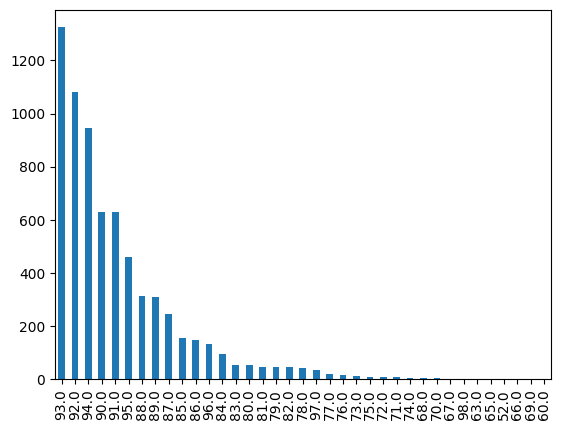

In [17]:
# show distribution of the ratings
df["rating"].value_counts().plot(kind="bar")

<AxesSubplot: >

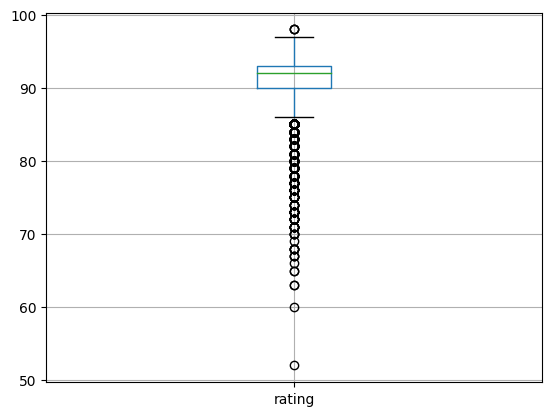

In [18]:
# boxplot of the ratings
df.boxplot(column="rating")

In [19]:
# standradeviation of the ratings
df["rating"].std()

4.109913161899763

In [20]:
data_x = df["text"].values
data_y = df["rating"].values

# to numpy array
data_x = np.array(data_x)
data_y = np.array(data_y)

In [21]:
df.text[0]

'Remarkably sweet, rich-toned, deeply floral. Star jasmine, lychee, dried ginger, cocoa nib, myrrh in aroma and cup. Sweetly tart structure with juicy, lively acidity; delicate, very syrupy mouthfeel. Crisp, long, fruit- and cocoa-toned finish.'

In [22]:
# remove stopwords
stop_words = set(stopwords.words('english'))

# add and to the stopwords
stop_words.add("and")


# remove stopwords
data_x = [" ".join([word for word in text.split() if word not in stop_words]) for text in data_x]

In [23]:
df.text[0]

'Remarkably sweet, rich-toned, deeply floral. Star jasmine, lychee, dried ginger, cocoa nib, myrrh in aroma and cup. Sweetly tart structure with juicy, lively acidity; delicate, very syrupy mouthfeel. Crisp, long, fruit- and cocoa-toned finish.'

In [24]:
# train test split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [25]:
NB_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', norm='l2', ngram_range=(2, 2) , stop_words=stop_words)),
    ('clf', LinearRegression()),
])
NB_pipeline.fit(train_x, train_y)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(2, 2),
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('clf', LinearRegression())])

In [26]:
# get the most important features
feature_names = NB_pipeline.named_steps['tfidf'].get_feature_names()
coefs_with_fns = sorted(zip(NB_pipeline.named_steps['clf'].coef_, feature_names))
top = zip(coefs_with_fns[:10], coefs_with_fns[:-(10 + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))


	-12.4516	burned board   		21.8074	aroma cup      
	-11.6253	negligible acidity		13.6769	syrupy mouthfeel
	-10.3086	coffee cools   		11.2557	evaluated espresso
	-9.2308	bitterish acidity		9.4075	satiny mouthfeel
	-9.1308	grace notes    		8.9689	small cup      
	-8.9663	fermented notes		8.9429	silky mouthfeel
	-8.6351	rotten compost 		8.9372	smooth mouthfeel
	-8.2186	salted meat    		8.8910	long finish    
	-8.1581	cloyingly sweet		8.5250	flavor saturated
	-7.6166	acrid structure		8.4777	buoyant mouthfeel


/Users/christopherlohse/Library/Caches/pypoetry/virtualenvs/group-project-zbs9HXug-py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
# make a table with the most important features
feature_names = NB_pipeline.named_steps['tfidf'].get_feature_names()
coefs_with_fns = sorted(zip(NB_pipeline.named_steps['clf'].coef_, feature_names))
top = zip(coefs_with_fns[:10], coefs_with_fns[:-(10 + 1):-1])
df = pd.DataFrame()
for (coef_1, fn_1), (coef_2, fn_2) in top:
    df = df.append({"coef_1": coef_1, "fn_1": fn_1, "coef_2": coef_2, "fn_2": fn_2}, ignore_index=True)

df

/Users/christopherlohse/Library/Caches/pypoetry/virtualenvs/group-project-zbs9HXug-py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/p9/8wv53k8n26dcpg3tjcvv6ll80000gn/T/ipykernel_64776/302177406.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"coef_1": coef_1, "fn_1": fn_1, "coef_2": coef_2, "fn_2": fn_2}, ignore_index=True)
/var/folders/p9/8wv53k8n26dcpg3tjcvv6ll80000gn/T/ipykernel_64776/302177406.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"coef_1": coef_1, "fn_1": fn_1, "coef_2": coef_2, "fn_2": fn_2}, ignore_index=True)
/var/fo

,coef_1,fn_1,coef_2,fn_2
0,-12.451633,burned board,21.807378,aroma cup
1,-11.625289,negligible acidity,13.676911,syrupy mouthfeel
2,-10.308630,coffee cools,11.255743,evaluated espresso
3,-9.230802,bitterish acidity,9.407487,satiny mouthfeel
4,-9.130832,grace notes,8.968863,small cup
5,-8.966316,fermented notes,8.942867,silky mouthfeel
6,-8.635082,rotten compost,8.937159,smooth mouthfeel
7,-8.218587,salted meat,8.891046,long finish
8,-8.158133,cloyingly sweet,8.525046,flavor saturated
9,-7.616585,acrid structure,8.477712,buoyant mouthfeel


/var/folders/p9/8wv53k8n26dcpg3tjcvv6ll80000gn/T/ipykernel_64776/1193707983.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


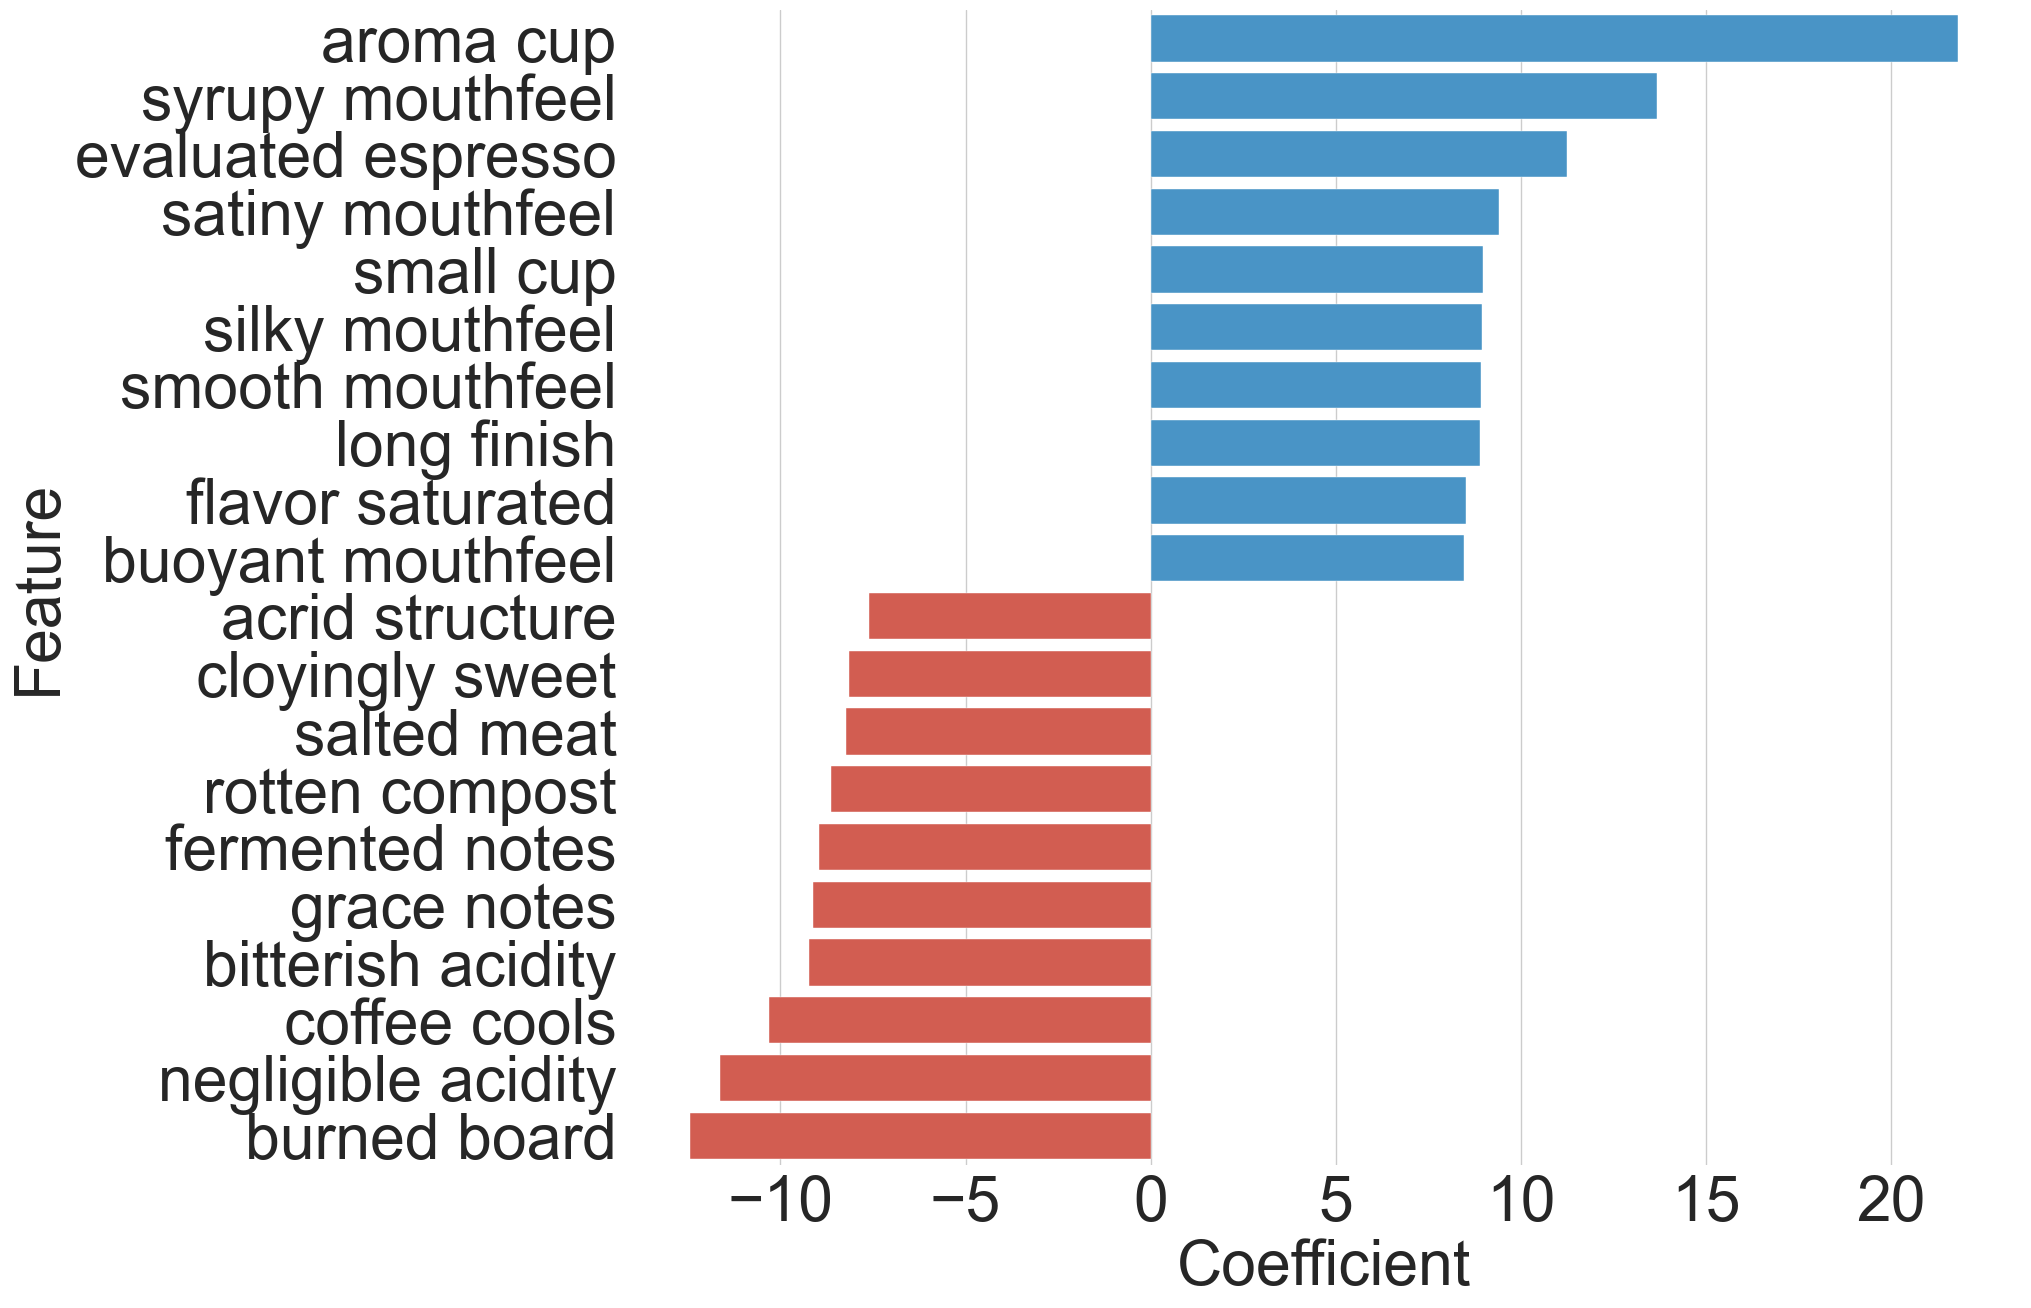

In [81]:
# make a barplot with the most important features color positive and negative in blue and red in the same plot
# !pip install seaborn

plt.rc('font', size=30)
import seaborn as sns
# change plot size
plt.figure(figsize=(18, 15))
# set sns style
# set matplotlib style
plt.style.use("seaborn")
sns.set_style("whitegrid")
#sns.set(style="whitegrid")
values_neg = list(df["fn_1"].values)
values_neg.reverse()
coef_neg = list(df["coef_1"].values)
coef_neg.reverse()
sns.set_color_codes("pastel")
x = list(df["fn_2"].values) + values_neg
y = list(df["coef_2"].values) + coef_neg
# colors = ["red" if y_ < 0 else "blue" for y_ in y]
# set pastel  solor manurally pastel red and blue for negative and positive
colors = ["#e74c3c" if y_ < 0 else "#3498db" for y_ in y]
# vertical barplot
sns.barplot(x=y, y=x, palette=colors)
# rotate the labels
# add labels
plt.xlabel("Coefficient", fontsize=45)
plt.ylabel("Feature", fontsize=45)
 # bigger text for axis labels
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)


 # show the seaborn plot
plt.show()

In [37]:
y

[-12.451633122549756,
 -11.625289231353426,
 -10.308629661988002,
 -9.23080182490265,
 -9.130831928150613,
 -8.966316038510856,
 -8.63508181357104,
 -8.218587136384123,
 -8.15813348589214,
 -7.616585097445015,
 21.807377960703217,
 13.676911047029446,
 11.255743101093568,
 9.407487122576478,
 8.968863467037853,
 8.942866682768946,
 8.937159291345205,
 8.891046038477256,
 8.525046410942052,
 8.477712047216245]

In [63]:
# ditribution of coefficients 

coef = NB_pipeline.named_steps['clf'].coef_


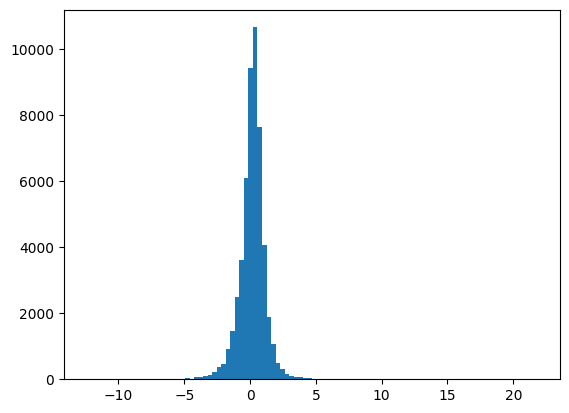

In [64]:
plt.hist(coef, bins=100)

plt.show()


In [65]:
top

In [66]:
# ge the vector size
vector_size = len(NB_pipeline.named_steps["tfidf"].get_feature_names())

/Users/christopherlohse/Library/Caches/pypoetry/virtualenvs/group-project-zbs9HXug-py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [67]:
vector_size

52143

In [68]:
# predict
pred = NB_pipeline.predict(test_x)
# score with mean absolute error
print("MAE: ", np.mean(np.abs(pred - test_y)))

MAE:  1.6655766008776638


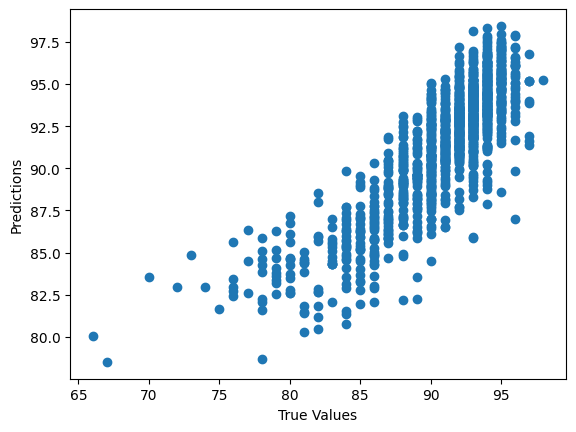

In [69]:
# plot the results against the test data
plt.scatter(test_y, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [70]:
# test one review
review = test_x[5]
print(review)
print("Predicted rating: ", NB_pipeline.predict([review]))
# true rating
print("True rating: ", test_y[5])

Crisply sweet, elegantly tart. Blackcurrant, baker’s chocolate, lemon verbena, lavender aroma cup. Round, richly tart acidity; lightly plush mouthfeel. Blackcurrant lemon verbena carry resonant finish.
Predicted rating:  [92.51452043]
True rating:  93.0


In [88]:
# apply ridge regression
from sklearn.linear_model import Ridge

Ridge_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', norm='l2', ngram_range=(2, 2) , stop_words=stop_words)),
    ('clf', Ridge()),
])
Ridge_pipeline.fit(train_x, train_y)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(2, 2),
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('clf', Ridge())])

In [86]:
# test
pred = Ridge_pipeline.predict(test_x)
# score with mean absolute error
print("MAE: ", np.mean(np.abs(pred - test_y)))

MAE:  1.5687514752760272


/Users/christopherlohse/Library/Caches/pypoetry/virtualenvs/group-project-zbs9HXug-py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/p9/8wv53k8n26dcpg3tjcvv6ll80000gn/T/ipykernel_64776/2993858546.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"coef_1": coef_1, "fn_1": fn_1, "coef_2": coef_2, "fn_2": fn_2}, ignore_index=True)
/var/folders/p9/8wv53k8n26dcpg3tjcvv6ll80000gn/T/ipykernel_64776/2993858546.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"coef_1": coef_1, "fn_1": fn_1, "coef_2": coef_2, "fn_2": fn_2}, ignore_index=True)
/va

	-10.6958	dark roast     		13.6265	aroma cup      
	-8.3517	coffee cools   		8.7373	syrupy mouthfeel
	-7.8717	burned board   		7.4748	flavor saturated
	-7.5355	grace notes    		6.9985	evaluated espresso
	-6.6315	negligible acidity		6.3030	black currant  
	-5.8323	bitterish acidity		6.0704	saturated finish
	-5.5604	cloyingly sweet		5.8627	silky mouthfeel
	-5.4391	lean mouthfeel 		5.7062	satiny mouthfeel
	-5.0939	fermented notes		5.6529	long finish    
	-5.0345	leanish mouthfeel		5.4184	juicy acidity  


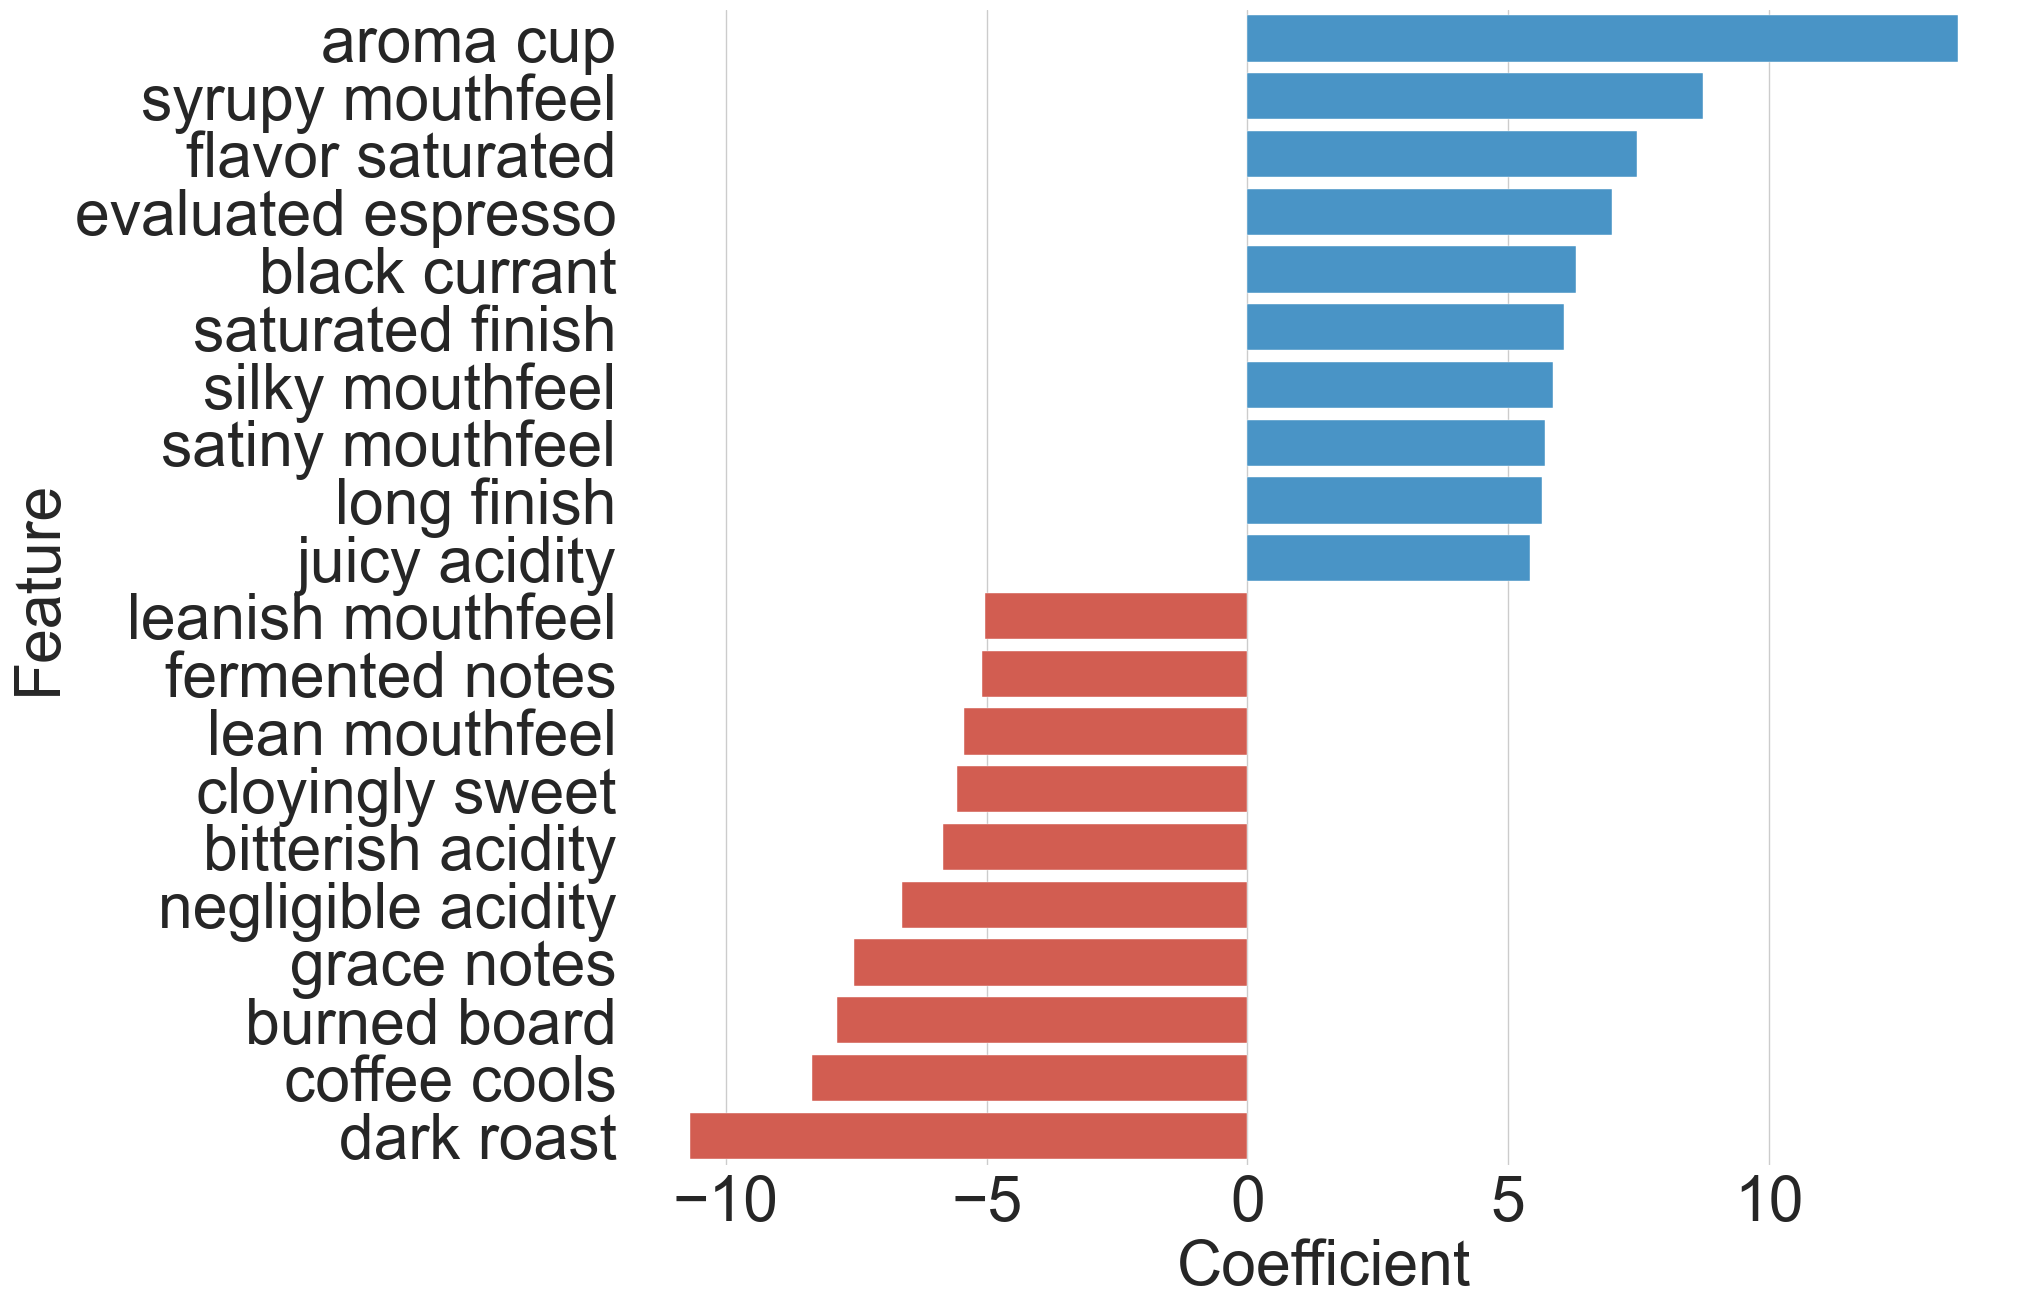

In [87]:
# plot the most important features for ridge regression as before
# get the most important features
feature_names = Ridge_pipeline.named_steps['tfidf'].get_feature_names()
coefs_with_fns = sorted(zip(Ridge_pipeline.named_steps['clf'].coef_, feature_names))
top = zip(coefs_with_fns[:10], coefs_with_fns[:-(10 + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

# put into a dataframe
feature_names = Ridge_pipeline.named_steps['tfidf'].get_feature_names()
coefs_with_fns = sorted(zip(Ridge_pipeline.named_steps['clf'].coef_, feature_names))
top = zip(coefs_with_fns[:10], coefs_with_fns[:-(10 + 1):-1])
df = pd.DataFrame()
for (coef_1, fn_1), (coef_2, fn_2) in top:
    df = df.append({"coef_1": coef_1, "fn_1": fn_1, "coef_2": coef_2, "fn_2": fn_2}, ignore_index=True)


# make the barplot
plt.rc('font', size=30)
import seaborn as sns
# change plot size
plt.figure(figsize=(18, 15))
# set sns style
# set matplotlib style
plt.style.use("seaborn")
sns.set_style("whitegrid")
#sns.set(style="whitegrid")
values_neg = list(df["fn_1"].values)
values_neg.reverse()
coef_neg = list(df["coef_1"].values)
coef_neg.reverse()
sns.set_color_codes("pastel")
x = list(df["fn_2"].values) + values_neg
y = list(df["coef_2"].values) + coef_neg
# colors = ["red" if y_ < 0 else "blue" for y_ in y]
# set pastel  solor manurally pastel red and blue for negative and positive
colors = ["#e74c3c" if y_ < 0 else "#3498db" for y_ in y]
# vertical barplot
sns.barplot(x=y, y=x, palette=colors)
# rotate the labels
# add labels
plt.xlabel("Coefficient", fontsize=45)
plt.ylabel("Feature", fontsize=45)
    # bigger text for axis labels
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)

# show the seaborn plot
plt.show()

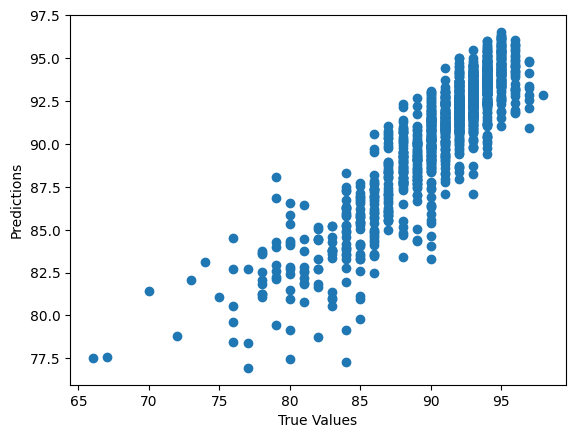

In [73]:
# plot the results against the test data
plt.scatter(test_y, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [74]:
# test one review
review = test_x[5]
print(review)
print("Predicted rating: ", Ridge_pipeline.predict([review]))
# true rating
print("True rating: ", test_y[5])

Crisply sweet, elegantly tart. Blackcurrant, baker’s chocolate, lemon verbena, lavender aroma cup. Round, richly tart acidity; lightly plush mouthfeel. Blackcurrant lemon verbena carry resonant finish.
Predicted rating:  [92.23219125]
True rating:  93.0


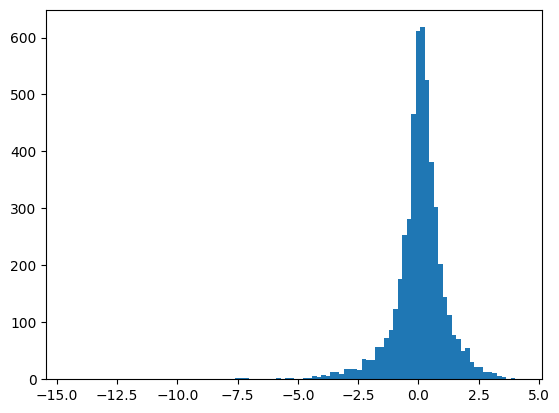

In [75]:
# distribution of the coefficients
coef = Ridge_pipeline.named_steps['clf'].coef_
plt.hist(coef, bins=100)
plt.show()

In [34]:
# use knn for regression
from sklearn.neighbors import KNeighborsRegressor


knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', norm='l2')),
    ('clf', KNeighborsRegressor(n_neighbors=5)),
])

knn_pipeline.fit(train_x, train_y)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsRegressor())])

In [35]:
# test the model
pred = knn_pipeline.predict(test_x)
# score with mean absolute error
print("MAE: ", np.mean(np.abs(pred - test_y)))

MAE:  1.9917331399564904


In [36]:
# get vectors for the train data
train_vectors = TfidfVectorizer(analyzer='word', norm='l2').fit_transform(train_x)


In [37]:
train_vectors = train_vectors.toarray()

In [38]:
train_vectors[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
import matplotlib.style as style
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re

import numpy as np
import pandas as pd

import re
import string
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.utils import to_categorical
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np


In [40]:
# get max length of the text
max_length = max([len(s.split()) for s in df["text"]])

max_length

124

In [94]:
def custom_standardization(input_data):
  return tf.strings.regex_replace(input_data,
                                  '[%s]' % re.escape(string.punctuation), '')


sequence_length = 300
vocab_size = 10000


In [95]:
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length, pad_to_max_tokens=True)


In [96]:
vectorize_layer.adapt(train_x)


In [97]:
class EmbeddingModel(tf.keras.Model):

    """"
    This is a model to train a Word2Vec Classifier. Based on WordEmbeddings.

    Parameters:
    -----------
    vocab_size: int
        The number of words in the vocabulary.
    sequence_length: int
        The length of the sequences.
    embedding_dim: int
        The dimension of the embedding.
    """

    def __init__(self, vocab_size, embedding_dim, vectorize_layer):
        super(EmbeddingModel, self).__init__()
        self.vectorize_layer = vectorize_layer
        self.embedding = tf.keras.layers.Embedding(
            vocab_size, embedding_dim, mask_zero=True)
        self.pool = tf.keras.layers.GlobalMaxPooling1D()
        self.dropout_1 = tf.keras.layers.Dropout(0.2)
        #self.dense_1 = tf.keras.layers.Dense(256, activation='relu')
        self.dropout_2 = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout_3 = tf.keras.layers.Dropout(0.2)
        self.out = tf.keras.layers.Dense(
            1,)
    """
    This function is used to call the model.
    
    Parameters:
    -----------
    inputs: tensor
        The input data.
    """

    def call(self, x):
        x = self.vectorize_layer(x)
        x = self.embedding(x)
        x = self.pool(x)
        #x = self.dropout_2(x)
        x = self.dense_2(x)
        #x = self.dropout_3(x)
        x = self.out(x)
        return x
    """
    This function is used to compile the model.

    Parameters:
    -----------
    optimizer: str
        The optimizer to use.
        loss: str
            The loss function to use.
        metrics: str
            The metrics to use.
    """

    def compile(self, optimizer, loss, metrics):
        super(EmbeddingModel, self).compile(optimizer, loss, metrics)


In [98]:
embedding_dim = 64
model = EmbeddingModel(vocab_size, embedding_dim, vectorize_layer)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer,
              loss='mse', metrics=['mae'])
# set random seed
tf.random.set_seed(42)


In [99]:
history = model.fit(train_x,train_y, epochs=100, batch_size=128,validation_split=0.2, verbose=1)

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 7165.9438 - mae: 84.3184 - val_loss: 4396.7705 - val_mae: 66.2058
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 1168.2513 - mae: 27.3926 - val_loss: 88.0802 - val_mae: 8.7243
Epoch 3/100
35/35 [==============================] - 0s 6ms/step - loss: 25.9997 - mae: 3.9075 - val_loss: 12.8938 - val_mae: 2.5475
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 11.5283 - mae: 2.2454 - val_loss: 9.4740 - val_mae: 2.0950
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 9.4735 - mae: 2.0155 - val_loss: 8.3075 - val_mae: 1.9590
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 8.2695 - mae: 1.8848 - val_loss: 7.5270 - val_mae: 1.8563
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 7.4369 - mae: 1.7980 - val_loss: 7.1069 - val_mae: 1.8245
Epoch 8/100
35/35 [==============================] - 0s 7ms/step - 

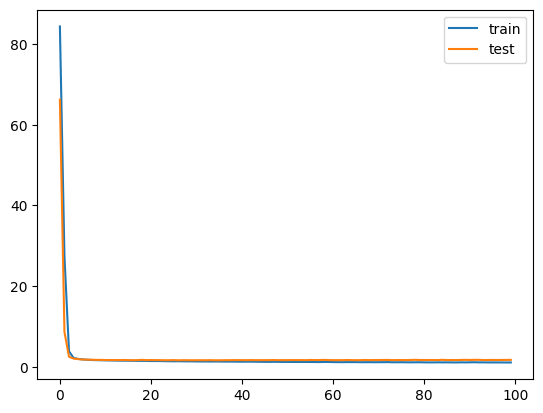

In [100]:
# plot history
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()


In [101]:
model.summary()

Model: "embedding_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  multiple                 0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     multiple                  640000    
                                                                 
 global_max_pooling1d_1 (Glo  multiple                 0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         multiple                  0 (unused)
                                                                 
 dropout_4 (Dropout)         multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple            

In [102]:
# get a vector for a review
review = train_x[0]
print(review)
# just call the embedding layer
vector = model.embedding(vectorize_layer([review]))
print(vector.shape)

Evaluated as espresso. Crisply but sweetly bright-toned in aroma and small cup: apricot, lemon, milk chocolate. Lightly syrupy mouthfeel. Lovely delicacy and complexity in two parts milk: the mild chocolate note dominates with continuing and distinct hints of lemon and apricot-like fruit.
(1, 300, 64)


In [103]:
len(train_x[0])

289

In [104]:
vector = np.array(vector)
vector.shape

(1, 300, 64)

In [105]:
vector[0][0]

array([-0.04458845,  0.02146002,  0.00648482, -0.0369307 , -0.00341944,
        0.3363732 , -0.03390002,  0.03203974, -0.00089074,  0.02338037,
        0.02715416, -0.02640079, -0.01525163,  0.02487124,  0.00422925,
       -0.02545115,  0.03515336,  0.273464  , -0.17895973, -0.00888271,
        0.24005094, -0.4003697 ,  0.00720859, -0.02105384,  0.01929149,
        0.03312312, -0.04679607, -0.01815296, -0.03835599,  0.09474415,
        0.02577968,  0.01539635,  0.02388621,  0.00433519, -0.02118832,
       -0.04476405, -0.0359096 , -0.03280316,  0.03896214, -0.02446381,
       -0.02950541,  0.01836241,  0.01853534,  0.00648546, -0.04489274,
       -0.16869268, -0.02010534, -0.03317227, -0.03880638,  0.28371322,
        0.00160406, -0.02223783, -0.24349827, -0.1380833 , -0.01066518,
        0.01853771, -0.0191285 ,  0.01767058, -0.0197507 ,  0.01478345,
       -0.0116157 , -0.03314519,  0.04521896, -0.25026157], dtype=float32)

In [106]:
# viszuliaze the vector in a plot with 2 dimensions using TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# get the vectors for the first review
review = train_x[0]
vector = model.embedding(vectorize_layer([review]))
# reshape the vector
vector = np.array(vector)
# limit to length of the review

vector = vector.reshape((vector.shape[1], vector.shape[2]))



In [107]:
vector.shape


vector = vector[:len(review.split()), :]

In [108]:
vector.shape

(42, 64)

In [109]:
#use TSNE
tsne = TSNE(n_components=2)
# transform the vector
vector_t = tsne.fit_transform(vector)


/Users/christopherlohse/Library/Caches/pypoetry/virtualenvs/group-project-zbs9HXug-py3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/christopherlohse/Library/Caches/pypoetry/virtualenvs/group-project-zbs9HXug-py3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [110]:
vector.shape

(42, 64)

In [111]:
# use pca to reduce the dimensions to 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vector_p = pca.fit_transform(vector)


In [112]:
review.split()


['Evaluated',
 'as',
 'espresso.',
 'Crisply',
 'but',
 'sweetly',
 'bright-toned',
 'in',
 'aroma',
 'and',
 'small',
 'cup:',
 'apricot,',
 'lemon,',
 'milk',
 'chocolate.',
 'Lightly',
 'syrupy',
 'mouthfeel.',
 'Lovely',
 'delicacy',
 'and',
 'complexity',
 'in',
 'two',
 'parts',
 'milk:',
 'the',
 'mild',
 'chocolate',
 'note',
 'dominates',
 'with',
 'continuing',
 'and',
 'distinct',
 'hints',
 'of',
 'lemon',
 'and',
 'apricot-like',
 'fruit.']

In [113]:
vector.shape

(42, 64)

In [114]:
# plot the vector USING PLOTy
import plotly.express as px

fig = px.scatter(x=vector[:, 0], y=vector_t[:, 1], text=review.split())
# annotate the words

fig.show()


In [115]:
# same 
fig = px.scatter(x=vector_p[:, 0], y=vector_p[:, 1], text=review.split())
fig.show()

In [116]:
vector.shape

(42, 64)

In [117]:
# test the model
pred = model.predict(test_x)
# score with mean absolute error
from sklearn.metrics import mean_absolute_error
print("MAE: ", mean_absolute_error(pred, test_y))

44/44 [==============================] - 0s 951us/step
MAE:  1.8011793893173693


In [118]:
# predict one review
review = test_x[0]
print(review)
print("Predicted rating: ", model.predict([review]))
# true rating
print("True rating: ", test_y[0])

Richly fruit-forward, chocolate-toned. Dried blueberry, chocolate fudge, gardenia, cashew, orange zest in aroma and cup. Deeply sweet with fruity acidity; plush, creamy mouthfeel. Chocolaty finish with blueberry and orange complication.
1/1 [==============================] - 0s 17ms/step
Predicted rating:  [[92.09524]]
True rating:  93.0


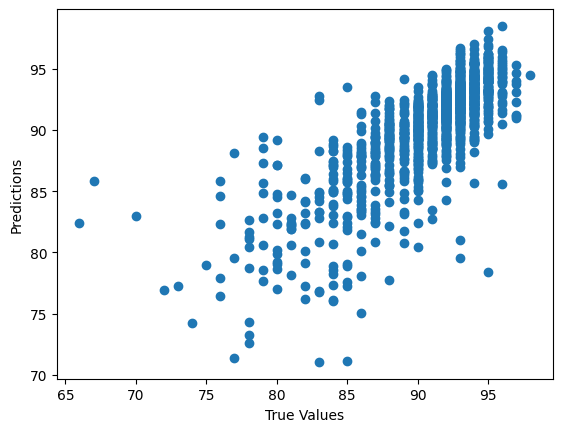

In [119]:
# scatter plot of predictions
plt.scatter(test_y, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [120]:
# baseline model with mean
from sklearn.dummy import DummyRegressor

dummy_mean = DummyRegressor(strategy="mean")
dummy_mean.fit(train_x, train_y)
pred = dummy_mean.predict(test_x)
print("MAE: ", mean_absolute_error(pred, test_y))


MAE:  2.9461985474383607


In [121]:
# alternative model with median
dummy_median = DummyRegressor(strategy="median")
dummy_median.fit(train_x, train_y)
pred = dummy_median.predict(test_x)
print("MAE: ", mean_absolute_error(pred, test_y))


MAE:  2.7505438723712836
